In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
Y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

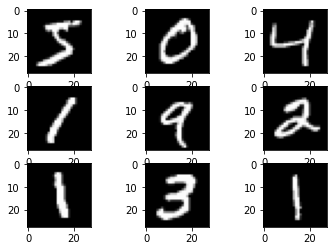

In [7]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)

In [9]:
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

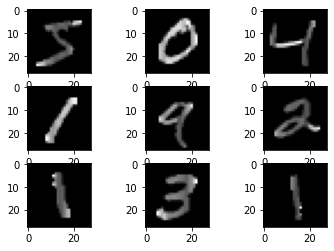

In [10]:
#Visualising the data after normalization
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
image_shape = X_train_r.shape[1:]
print(image_shape)

(28, 28, 1)


In [12]:
model = model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1904 - accuracy: 0.9404
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0741 - accuracy: 0.9765
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0550 - accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0369 - accuracy: 0.9879
Epoch 6/10
 802/1875 [===========>..................] - ETA: 20s - loss: 0.0313 - accuracy: 0.9904

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [17]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 1s 4ms/step - loss: 66.7322 - accuracy: 0.9477
Validation loss :  6673.221588134766 %
Validation accuracy :  94.7700023651123 %


In [23]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Machine Learning Projects/Mnist.model\assets


In [24]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")

In [25]:
predictions = new_model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


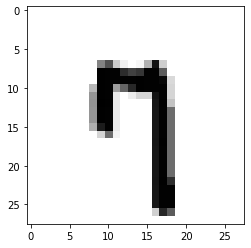

In [26]:
plt.imshow(X_test[80], cmap = plt.get_cmap('binary'))

In [27]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
